In [93]:
# install.packages("openNLP")
# install.packages("wordcloud")
# install.packages('stringr')
# install.packages('hunspell')
# install.packages('ds4psy')
# install.packages("glue")
# install.packages('textclean')
# install.packages("tm")
# install.packages("tokenizers")
# install.packages('parsedate')
# install.packages('spacyr')
# install.packages('caret')

In [94]:
library('stringr')
library('hunspell')
library('ds4psy')
library('glue')
library('spacyr')
library('tm')
library('dplyr',  warn.conflicts = FALSE)
library('parsedate')
library("tokenizers", warn.conflicts = FALSE)

# replacing contractions with full forms
library('textclean')
library('caret')
library("e1071")

In [95]:
# Cleaning dataset for further usage
# msa = Music Sentiment Analysis

# reading dataset
msa_dataset <- read.csv('../Datasets/use_this_for_eda.csv')
# msa_dataset = filter(msa_dataset, sentiment != "relaxed")

# saving unprocessed lyrics
# msa_dataset['unprocessed_lyrics'] = msa_dataset['lyrics']
names(msa_dataset)

[1] "title"            "artist"           "release_date"     "danceability"    
 [5] "energy"           "key"              "loudness"         "mode"            
 [9] "acousticness"     "instrumentalness" "liveness"         "valence"         
[13] "tempo"            "duration_ms"      "lyrics"           "sentiment"

In [96]:
# displaying dataset
head(msa_dataset[c('mode','valence','energy','danceability','acousticness','sentiment')], 5)

,mode,valence,energy,danceability,acousticness,sentiment
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,0.509,0.842,0.673,0.0248,happy
2,0,0.458,0.780,0.545,0.0309,happy
3,1,0.523,0.794,0.728,0.1480,happy
4,0,0.177,0.685,0.677,0.0739,angry
5,1,0.330,0.762,0.783,0.1580,happy


In [97]:
# dataset columns
column_names = colnames(msa_dataset)
column_names

[1] "title"            "artist"           "release_date"     "danceability"    
 [5] "energy"           "key"              "loudness"         "mode"            
 [9] "acousticness"     "instrumentalness" "liveness"         "valence"         
[13] "tempo"            "duration_ms"      "lyrics"           "sentiment"

In [98]:
# # removing X column
# msa_dataset = msa_dataset[column_names[2:length(column_names)]]
# names(msa_dataset)

In [99]:
# first 2 lyrics and sentments
head(msa_dataset[c('lyrics', 'sentiment')], 2)

,lyrics,sentiment
,<chr>,<chr>
1,"Hula Hoop Lyrics[Intro] Oh, hey [Verse 1] Rollerskates, tan lines Hot sun clear blue skies The waves are crashing by And when she passed me by And gave a wink and smile And I was on cloud nine Lord [Pre-Chorus] The way you move your hips And lick your lips The way you dip You got me up so high (hey-ey) And girl you got that body With them curves like a Bugatti I just wanna drive, oh [Chorus] And girl you know Round and round your loving winds me up Like a hula, hula hoop, hula, hula hoop, oh Round and round your loving winds me up Like a hula, hula hoop, hula, hula hoop, oh Round and round your loving winds me up Like a hula, hula hoop, hula, hula hoop, oh Round and round your loving winds me up Like a hula, hula hoop, hula, hula hoop, oh Oh-oh-oh-oh [Verse 2] And gravity defied I can't believe my eyes That thing can bring the tides, hey And round and round clockwise Like a merry-go-ride I wanna go all night, yes You might also like[Pre-Chorus] The way you move your hips And lick your lips The way you dip You got me up so high, yeah (hey-ey) And girl you got that body With them curves like a Bugatti I just wanna drive, oh [Chorus] And girl you know Round and round your loving winds me up Like a hula, hula hoop, hula, hula hoop, oh Round and round your loving winds me up Like a hula, hula hoop, hula, hula hoop, oh Round and round your loving winds me up Like a hula, hula hoop, hula, hula hoop, oh Round and round your loving winds me up Like a hula, hula hoop, hula, hula hoop, oh [Bridge] Oh-oh-oh, yeah Oh-oh-oh, oh Oh-oh-oh, yeah Like a hula, hula hoop, hula, hula hoop, oh [Chorus] Round and round your loving winds me up Like a hula, hula hoop, hula, hula hoop, oh Round and round your loving winds me up Like a hula, hula hoop, hula, hula hoop, oh Round and round your loving winds me up Like a hula, hula hoop, hula, hula hoop, oh [Outro] Oh-oh-oh-oh Round and round your loving winds me up Like a hula, hula hoop, hula, hula hoop, oh8Embed",happy
2,"Hey Brother Lyrics[Verse 1] Hey, brother There's an endless road to rediscover Hey, sister Know the water's sweet but blood is thicker [Chorus] Oh, if the sky comes falling down For you, there's nothing in this world I wouldn't do [Verse 2] Hey, brother Do you still believe in one another? Hey, sister Do you still believe in love? I wonder [Chorus] Oh, if the sky comes falling down For you, there's nothing in this world I wouldn't do [Post-Chorus] What if I'm far from home? Oh brother, I will hear you call What if I lose it all? Oh sister, I will help you out Oh, if the sky comes falling down For you, there's nothing in this world I wouldn't do [Instrumental Break] [Verse 3] Hey, brother There's an endless road to rediscover Hey, sister Do you still believe in love? I wonder [Chorus] Oh, if the sky comes falling down For you, there's nothing in this world I wouldn't do [Post-Chorus] What if I'm far from home? Oh brother, I will hear you call What if I lose it all? Oh sister, I will help you out Oh, if the sky comes falling down For you, there's nothing in this world I wouldn't doYou might also like116Embed",happy


# Text Preprocessing 
Primary data or raw data is often filled with unhelpful details (noise). Preprocessing is the step that separates helpful data from noise. This step transforms the raw data into a format that can be used to perform further analysis like EDA and model building. In general, data is made ready for exploratory analysis by handling missing values, outiliers, formating information like dates to a more readable format, removing data pieces that may distort analysis and so on.

<br>

In our case, we are working with text data. For text data, text preprocessing would include activities like converting all the text to one cause (usually lowercase), removing unwanted characters or divisions or patterns from our text, spelling corrections, removing contractions, removing unwanted non printable characters like extra spaces and finally tokenization. The following are the various steps we used in order to make our data ready for analysis.

<br>

<i>
It is worth noting that the steps used to preprocess your data would greatly depend on the type of data you have collected. That is the steps invloved in cleaning text data (say lyrics or tweets) is not neccessarily the same steps involved in cleaning numerical data (say stocks).
</i>

**1) Converting lyrics to lower case:**
    <p>In this step, all letters are converted into lowercase. This brings your data to a consistent format (interms of letters). Without this step, the machine would treat the same words differently if they have different cases for example "Run" will be considered different from "run" or "RUN" or "rUN" and so on. It is important to node that this step is important for languages like English because the causes do not really matter. On the other hand, for a language like German where capitalization is an important aspect of the language, it is important to retain the original forms of the words (forms in terms of capitalization).</p>
    
<br>

**2) Removing lyrics divisions:**
    <p>In the course of collecting our lyrics from genius, we noticed that the lyrics were divided in to subsections like chorus, pre-chorus, intro and so on. Moreso, some of the lyrics contained timestamps. All of these are not useful during sentiment analyis thus this step gets rid of such sections. Since all these section dividers have a pattern, we made use of regex to remove time.</p>
    
<br>
    
**3) Correcting spellings:**
   <p>As human beings, we are bound to make errors in many aspects of our life including typing. This step runs each lyric through a function that searches for all typos and predicts the best possible replacement for that word.</p>
   
<br>

**4) Removing contractions:**
    <p>In English language, a contraction is a combination of two or more words in order to shorten the form by droping letters and replacing them with a single apostrophe. For example, the contraction for "does not" is "doesn't", "are not" is "ain't". It is important to decompose contractions as it brings our data to a standardized format (just like in step 1).</p>
    
**5) Removing special characters (punctuations) and non alphabetical characters (like numbers)**
    <p>Special characters are non-alphanumeric characters. These characters do not really add any value to the understanding of text. In this step, we will get rid of all such characters.</p>
    
   <p>Moreover, numeric characters do not really contribute to the understanding of sentiment from text. Thus numbers will be removed from the dataset.</p>
   
<p>Punctuations are marks that help us seperate sentecnce and their parts and also to clarify meanings. though these characters might be important in the part of speech tagging of words, it won't be used during model building and EDA. So, we will get rid of these characters but will keep a copy of each lyric contain these characters for future use.</p>
  
**6) Removing extra spaces if any***
 <p>In this step, we are simply getting rid of any extra spaces that are within our text data for example replacing two spaces with one, a tab with one space and new line with one space and so on.</p>
 
 
# Feature extraction
A feature is an attribute that describes a particular class or entity. Feature extraction is the process of extracting these attributes from our data. In our case of text mining, we are extracting features would help us better understand why a particular lyrics is classified as sad, happy or angry. The following are the steps we employed to extract useful features from our dataset.

**Part of speech tagging and Lemmatization**
**Stop words removal**
**DocumentTermMatrix using TFIDF**

### Searching for missing values

In [100]:
sum(is.na(msa_dataset))

[1] 0

### Parsing date to give every date the same format

In [101]:
# msa_dataset = transform(msa_dataset, release_date=unlist(str_split(parsedate::parse_date(release_date), " ")[1]))

In [102]:
# replacing ’ with '
msa_dataset = transform(msa_dataset, lyrics=str_replace_all(lyrics, "’", "\'"))

### 1) Converting lyrics to lowercase

In [103]:
msa_dataset = transform(msa_dataset, lyrics=tolower(lyrics))
head(msa_dataset[c('lyrics', 'sentiment')], 2)

,lyrics,sentiment
,<chr>,<chr>
1,"hula hoop lyrics[intro] oh, hey [verse 1] rollerskates, tan lines hot sun clear blue skies the waves are crashing by and when she passed me by and gave a wink and smile and i was on cloud nine lord [pre-chorus] the way you move your hips and lick your lips the way you dip you got me up so high (hey-ey) and girl you got that body with them curves like a bugatti i just wanna drive, oh [chorus] and girl you know round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh oh-oh-oh-oh [verse 2] and gravity defied i can't believe my eyes that thing can bring the tides, hey and round and round clockwise like a merry-go-ride i wanna go all night, yes you might also like[pre-chorus] the way you move your hips and lick your lips the way you dip you got me up so high, yeah (hey-ey) and girl you got that body with them curves like a bugatti i just wanna drive, oh [chorus] and girl you know round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh [bridge] oh-oh-oh, yeah oh-oh-oh, oh oh-oh-oh, yeah like a hula, hula hoop, hula, hula hoop, oh [chorus] round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh [outro] oh-oh-oh-oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh8embed",happy
2,"hey brother lyrics[verse 1] hey, brother there's an endless road to rediscover hey, sister know the water's sweet but blood is thicker [chorus] oh, if the sky comes falling down for you, there's nothing in this world i wouldn't do [verse 2] hey, brother do you still believe in one another? hey, sister do you still believe in love? i wonder [chorus] oh, if the sky comes falling down for you, there's nothing in this world i wouldn't do [post-chorus] what if i'm far from home? oh brother, i will hear you call what if i lose it all? oh sister, i will help you out oh, if the sky comes falling down for you, there's nothing in this world i wouldn't do [instrumental break] [verse 3] hey, brother there's an endless road to rediscover hey, sister do you still believe in love? i wonder [chorus] oh, if the sky comes falling down for you, there's nothing in this world i wouldn't do [post-chorus] what if i'm far from home? oh brother, i will hear you call what if i lose it all? oh sister, i will help you out oh, if the sky comes falling down for you, there's nothing in this world i wouldn't doyou might also like116embed",happy


### 2) Removing lyrics divisions,

In [104]:
msa_dataset = transform(
    msa_dataset, 
    lyrics=str_replace_all(
        string=lyrics, 
        pattern=r"(\[(.*?)\])", 
        replacement = " "
    )
)
head(msa_dataset[c('lyrics', 'sentiment')], 2)

,lyrics,sentiment
,<chr>,<chr>
1,"hula hoop lyrics oh, hey rollerskates, tan lines hot sun clear blue skies the waves are crashing by and when she passed me by and gave a wink and smile and i was on cloud nine lord the way you move your hips and lick your lips the way you dip you got me up so high (hey-ey) and girl you got that body with them curves like a bugatti i just wanna drive, oh and girl you know round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh oh-oh-oh-oh and gravity defied i can't believe my eyes that thing can bring the tides, hey and round and round clockwise like a merry-go-ride i wanna go all night, yes you might also like the way you move your hips and lick your lips the way you dip you got me up so high, yeah (hey-ey) and girl you got that body with them curves like a bugatti i just wanna drive, oh and girl you know round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh oh-oh-oh, yeah oh-oh-oh, oh oh-oh-oh, yeah like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh oh-oh-oh-oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh8embed",happy
2,"hey brother lyrics hey, brother there's an endless road to rediscover hey, sister know the water's sweet but blood is thicker oh, if the sky comes falling down for you, there's nothing in this world i wouldn't do hey, brother do you still believe in one another? hey, sister do you still believe in love? i wonder oh, if the sky comes falling down for you, there's nothing in this world i wouldn't do what if i'm far from home? oh brother, i will hear you call what if i lose it all? oh sister, i will help you out oh, if the sky comes falling down for you, there's nothing in this world i wouldn't do hey, brother there's an endless road to rediscover hey, sister do you still believe in love? i wonder oh, if the sky comes falling down for you, there's nothing in this world i wouldn't do what if i'm far from home? oh brother, i will hear you call what if i lose it all? oh sister, i will help you out oh, if the sky comes falling down for you, there's nothing in this world i wouldn't doyou might also like116embed",happy


### 3) Correcting spellings,

In [105]:
correct_spellings = function(lyrics){
    lyrics_local = lyrics
    print("correcting spellings")
    # checking spelling mistakes
    bad.words = hunspell(lyrics)

    # splitting bad words to a list of words
    bad.words = text_to_words(bad.words[1])

    # removing duplicates
    bad.words = unique(bad.words)

    # getting suggestions
    suggested.words = unlist(lapply(hunspell_suggest(unique(unlist(bad.words))), function(words) words[1]))
    
    # replacing bad words with suggestions
    new_lyrics = ""
    for (index in 1:length(bad.words)){
        print(glue(r"(\b{bad.words[index]}\b)"))
        new_lyrics = str_replace_all(
            string = lyrics_local, 
            pattern = glue(r"(\b{bad.words[index]}\b)"), 
            replacement = suggested.words[index]
        )
        lyrics_local = new_lyrics
    }
    return (lyrics_local)
}

In [106]:
# applying correct_spellings to all lyrics
msa_dataset = transform(msa_dataset, lyrics=tolower(correct_spellings(lyrics)))
head(msa_dataset[c('lyrics', 'sentiment')], 2)

[1] "correcting spellings"
\bc\b
\brollerskates\b
\bey\b
\bbugatti\b


,lyrics,sentiment
,<chr>,<chr>
1,"hula hoop lyrics oh, hey roller skates, tan lines hot sun clear blue skies the waves are crashing by and when she passed me by and gave a wink and smile and i was on cloud nine lord the way you move your hips and lick your lips the way you dip you got me up so high (hey-a) and girl you got that body with them curves like a bugatti i just wanna drive, oh and girl you know round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh oh-oh-oh-oh and gravity defied i can't believe my eyes that thing can bring the tides, hey and round and round clockwise like a merry-go-ride i wanna go all night, yes you might also like the way you move your hips and lick your lips the way you dip you got me up so high, yeah (hey-a) and girl you got that body with them curves like a bugatti i just wanna drive, oh and girl you know round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh oh-oh-oh, yeah oh-oh-oh, oh oh-oh-oh, yeah like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh oh-oh-oh-oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh8embed",happy
2,"hey brother lyrics hey, brother there's an endless road to rediscover hey, sister know the water's sweet but blood is thicker oh, if the sky comes falling down for you, there's nothing in this world i wouldn't do hey, brother do you still believe in one another? hey, sister do you still believe in love? i wonder oh, if the sky comes falling down for you, there's nothing in this world i wouldn't do what if i'm far from home? oh brother, i will hear you call what if i lose it all? oh sister, i will help you out oh, if the sky comes falling down for you, there's nothing in this world i wouldn't do hey, brother there's an endless road to rediscover hey, sister do you still believe in love? i wonder oh, if the sky comes falling down for you, there's nothing in this world i wouldn't do what if i'm far from home? oh brother, i will hear you call what if i lose it all? oh sister, i will help you out oh, if the sky comes falling down for you, there's nothing in this world i wouldn't doyou might also like116embed",happy


### 4) Removing contractions,

In [107]:
# replacing all contractions with their full forms
msa_dataset = transform(msa_dataset, lyrics=replace_contraction(lyrics))
head(msa_dataset[c('lyrics', 'sentiment')], 2)

,lyrics,sentiment
,<chr>,<chr>
1,"hula hoop lyrics oh, hey roller skates, tan lines hot sun clear blue skies the waves are crashing by and when she passed me by and gave a wink and smile and i was on cloud nine lord the way you move your hips and lick your lips the way you dip you got me up so high (hey-a) and girl you got that body with them curves like a bugatti i just wanna drive, oh and girl you know round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh oh-oh-oh-oh and gravity defied i can not believe my eyes that thing can bring the tides, hey and round and round clockwise like a merry-go-ride i wanna go all night, yes you might also like the way you move your hips and lick your lips the way you dip you got me up so high, yeah (hey-a) and girl you got that body with them curves like a bugatti i just wanna drive, oh and girl you know round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh oh-oh-oh, yeah oh-oh-oh, oh oh-oh-oh, yeah like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh oh-oh-oh-oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh8embed",happy
2,"hey brother lyrics hey, brother there is an endless road to rediscover hey, sister know the water's sweet but blood is thicker oh, if the sky comes falling down for you, there is nothing in this world i would not do hey, brother do you still believe in one another? hey, sister do you still believe in love? i wonder oh, if the sky comes falling down for you, there is nothing in this world i would not do what if I am far from home? oh brother, i will hear you call what if i lose it all? oh sister, i will help you out oh, if the sky comes falling down for you, there is nothing in this world i would not do hey, brother there is an endless road to rediscover hey, sister do you still believe in love? i wonder oh, if the sky comes falling down for you, there is nothing in this world i would not do what if I am far from home? oh brother, i will hear you call what if i lose it all? oh sister, i will help you out oh, if the sky comes falling down for you, there is nothing in this world i would not doyou might also like116embed",happy


### 6) Removing special characters (punctuations, periods, commas, brackets, quotes, etc) and numbers,

In [108]:
# replacing any internet slags that might have slipped in to the lyrics
msa_dataset = transform(msa_dataset, lyrics=replace_internet_slang(lyrics))
head(msa_dataset[c('lyrics', 'sentiment')], 2)

,lyrics,sentiment
,<chr>,<chr>
1,"hula hoop lyrics oh, hey roller skates, tan lines hot sun clear blue skies the waves are crashing by and when she passed me by and gave a wink and smile and i was on cloud nine lord the way you move your hips and lick your lips the way you dip you got me up so high (hey-a) and girl you got that body with them curves like a bugatti i just wanna drive, oh and girl you know round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh oh-oh-oh-oh and gravity defied i can not believe my eyes that thing can bring the tides, hey and round and round clockwise like a merry-go-ride i wanna go all night, yes you might also like the way you move your hips and lick your lips the way you dip you got me up so high, yeah (hey-a) and girl you got that body with them curves like a bugatti i just wanna drive, oh and girl you know round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh oh-oh-oh, yeah oh-oh-oh, oh oh-oh-oh, yeah like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh oh-oh-oh-oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh8embed",happy
2,"hey brother lyrics hey, brother there is an endless road to rediscover hey, sister know the water's sweet but blood is thicker oh, if the sky comes falling down for you, there is nothing in this world i would not do hey, brother do you still believe in one another? hey, sister do you still believe in love? i wonder oh, if the sky comes falling down for you, there is nothing in this world i would not do what if I am far from home? oh brother, i will hear you call what if i lose it all? oh sister, i will help you out oh, if the sky comes falling down for you, there is nothing in this world i would not do hey, brother there is an endless road to rediscover hey, sister do you still believe in love? i wonder oh, if the sky comes falling down for you, there is nothing in this world i would not do what if I am far from home? oh brother, i will hear you call what if i lose it all? oh sister, i will help you out oh, if the sky comes falling down for you, there is nothing in this world i would not doyou might also like116embed",happy


In [109]:
# replacing underscores with spaces
msa_dataset = transform(msa_dataset, lyrics=str_replace_all(lyrics, r"(\_?\-)", " "))
head(msa_dataset[c('lyrics', 'sentiment')], 2)

,lyrics,sentiment
,<chr>,<chr>
1,"hula hoop lyrics oh, hey roller skates, tan lines hot sun clear blue skies the waves are crashing by and when she passed me by and gave a wink and smile and i was on cloud nine lord the way you move your hips and lick your lips the way you dip you got me up so high (hey a) and girl you got that body with them curves like a bugatti i just wanna drive, oh and girl you know round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh oh oh oh oh and gravity defied i can not believe my eyes that thing can bring the tides, hey and round and round clockwise like a merry go ride i wanna go all night, yes you might also like the way you move your hips and lick your lips the way you dip you got me up so high, yeah (hey a) and girl you got that body with them curves like a bugatti i just wanna drive, oh and girl you know round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh oh oh oh, yeah oh oh oh, oh oh oh oh, yeah like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh oh oh oh oh round and round your loving winds me up like a hula, hula hoop, hula, hula hoop, oh8embed",happy
2,"hey brother lyrics hey, brother there is an endless road to rediscover hey, sister know the water's sweet but blood is thicker oh, if the sky comes falling down for you, there is nothing in this world i would not do hey, brother do you still believe in one another? hey, sister do you still believe in love? i wonder oh, if the sky comes falling down for you, there is nothing in this world i would not do what if I am far from home? oh brother, i will hear you call what if i lose it all? oh sister, i will help you out oh, if the sky comes falling down for you, there is nothing in this world i would not do hey, brother there is an endless road to rediscover hey, sister do you still believe in love? i wonder oh, if the sky comes falling down for you, there is nothing in this world i would not do what if I am far from home? oh brother, i will hear you call what if i lose it all? oh sister, i will help you out oh, if the sky comes falling down for you, there is nothing in this world i would not doyou might also like116embed",happy


In [110]:
msa_dataset['lyrics_with_punctuations'] = msa_dataset$lyrics

In [111]:
# removing all punctuations
msa_dataset = transform(msa_dataset, lyrics=tolower(removePunctuation(lyrics)))
head(msa_dataset[c('lyrics', 'sentiment')], 2)

,lyrics,sentiment
,<chr>,<chr>
1,hula hoop lyrics oh hey roller skates tan lines hot sun clear blue skies the waves are crashing by and when she passed me by and gave a wink and smile and i was on cloud nine lord the way you move your hips and lick your lips the way you dip you got me up so high hey a and girl you got that body with them curves like a bugatti i just wanna drive oh and girl you know round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh oh oh oh oh and gravity defied i can not believe my eyes that thing can bring the tides hey and round and round clockwise like a merry go ride i wanna go all night yes you might also like the way you move your hips and lick your lips the way you dip you got me up so high yeah hey a and girl you got that body with them curves like a bugatti i just wanna drive oh and girl you know round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh oh oh oh yeah oh oh oh oh oh oh oh yeah like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh oh oh oh oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh8embed,happy
2,hey brother lyrics hey brother there is an endless road to rediscover hey sister know the waters sweet but blood is thicker oh if the sky comes falling down for you there is nothing in this world i would not do hey brother do you still believe in one another hey sister do you still believe in love i wonder oh if the sky comes falling down for you there is nothing in this world i would not do what if i am far from home oh brother i will hear you call what if i lose it all oh sister i will help you out oh if the sky comes falling down for you there is nothing in this world i would not do hey brother there is an endless road to rediscover hey sister do you still believe in love i wonder oh if the sky comes falling down for you there is nothing in this world i would not do what if i am far from home oh brother i will hear you call what if i lose it all oh sister i will help you out oh if the sky comes falling down for you there is nothing in this world i would not doyou might also like116embed,happy


In [112]:
# removing all numbers
msa_dataset = transform(msa_dataset, lyrics=str_replace_all(lyrics, r"(\d)", " "))
head(msa_dataset[c('lyrics', 'sentiment')], 2)

,lyrics,sentiment
,<chr>,<chr>
1,hula hoop lyrics oh hey roller skates tan lines hot sun clear blue skies the waves are crashing by and when she passed me by and gave a wink and smile and i was on cloud nine lord the way you move your hips and lick your lips the way you dip you got me up so high hey a and girl you got that body with them curves like a bugatti i just wanna drive oh and girl you know round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh oh oh oh oh and gravity defied i can not believe my eyes that thing can bring the tides hey and round and round clockwise like a merry go ride i wanna go all night yes you might also like the way you move your hips and lick your lips the way you dip you got me up so high yeah hey a and girl you got that body with them curves like a bugatti i just wanna drive oh and girl you know round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh oh oh oh yeah oh oh oh oh oh oh oh yeah like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh oh oh oh oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh embed,happy
2,hey brother lyrics hey brother there is an endless road to rediscover hey sister know the waters sweet but blood is thicker oh if the sky comes falling down for you there is nothing in this world i would not do hey brother do you still believe in one another hey sister do you still believe in love i wonder oh if the sky comes falling down for you there is nothing in this world i would not do what if i am far from home oh brother i will hear you call what if i lose it all oh sister i will help you out oh if the sky comes falling down for you there is nothing in this world i would not do hey brother there is an endless road to rediscover hey sister do you still believe in love i wonder oh if the sky comes falling down for you there is nothing in this world i would not do what if i am far from home oh brother i will hear you call what if i lose it all oh sister i will help you out oh if the sky comes falling down for you there is nothing in this world i would not doyou might also like embed,happy


### 7) Removing extra spaces if any

In [113]:
# replacing all whitespace characters with one space
msa_dataset = transform(
    msa_dataset, 
    lyrics=str_replace_all(
        string=lyrics, 
        pattern=r"(\s+)", 
        replacement = " "
    )
)
head(msa_dataset[c('lyrics', 'sentiment')], 2)

,lyrics,sentiment
,<chr>,<chr>
1,hula hoop lyrics oh hey roller skates tan lines hot sun clear blue skies the waves are crashing by and when she passed me by and gave a wink and smile and i was on cloud nine lord the way you move your hips and lick your lips the way you dip you got me up so high hey a and girl you got that body with them curves like a bugatti i just wanna drive oh and girl you know round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh oh oh oh oh and gravity defied i can not believe my eyes that thing can bring the tides hey and round and round clockwise like a merry go ride i wanna go all night yes you might also like the way you move your hips and lick your lips the way you dip you got me up so high yeah hey a and girl you got that body with them curves like a bugatti i just wanna drive oh and girl you know round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh oh oh oh yeah oh oh oh oh oh oh oh yeah like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh oh oh oh oh round and round your loving winds me up like a hula hula hoop hula hula hoop oh embed,happy
2,hey brother lyrics hey brother there is an endless road to rediscover hey sister know the waters sweet but blood is thicker oh if the sky comes falling down for you there is nothing in this world i would not do hey brother do you still believe in one another hey sister do you still believe in love i wonder oh if the sky comes falling down for you there is nothing in this world i would not do what if i am far from home oh brother i will hear you call what if i lose it all oh sister i will help you out oh if the sky comes falling down for you there is nothing in this world i would not do hey brother there is an endless road to rediscover hey sister do you still believe in love i wonder oh if the sky comes falling down for you there is nothing in this world i would not do what if i am far from home oh brother i will hear you call what if i lose it all oh sister i will help you out oh if the sky comes falling down for you there is nothing in this world i would not doyou might also like embed,happy


In [114]:
# holds sentiments of each lyric
sentiments.classes = msa_dataset$sentiment
table(sentiments.classes)

sentiments.classes
angry happy   sad 
  429   417   530 

In [115]:
length(sentiments.classes)

[1] 1376

### 9) Lemmatization

In [116]:
# initializing spacyr
spacy_initialize(model = 'en_core_web_sm', virtualenv  = "/Users/yobahbertrandyonkou/spacyenv/")

spaCy is already initialized



NULL

In [117]:
# fetching english stopwords
stopwords.list = stopwords(kind = "en")
print(stopwords.list[56:86])

# removing contractions from stop words because lyrics does not have stop words
stopwords.cleaned = replace_contraction(stopwords.list)
print(stopwords.cleaned[56:86])

 [1] "could"   "ought"   "i'm"     "you're"  "he's"    "she's"   "it's"   
 [8] "we're"   "they're" "i've"    "you've"  "we've"   "they've" "i'd"    
[15] "you'd"   "he'd"    "she'd"   "we'd"    "they'd"  "i'll"    "you'll" 
[22] "he'll"   "she'll"  "we'll"   "they'll" "isn't"   "aren't"  "wasn't" 
[29] "weren't" "hasn't"  "haven't"
 [1] "could"      "ought"      "I am"       "you are"    "he is"     
 [6] "she is"     "it is"      "we are"     "they are"   "I have"    
[11] "you have"   "we have"    "they have"  "I would"    "you would" 
[16] "he would"   "she would"  "we would"   "they would" "I will"    
[21] "you will"   "he will"    "she will"   "we will"    "they will" 
[26] "is not"     "are not"    "was not"    "were not"   "has not"   
[31] "haven't"   


In [121]:
spacy_parse(msa_dataset$lyrics_with_punctuations[1], tag=TRUE, pos=TRUE)$pos

[1] "ADJ"   "NOUN"  "NOUN"  "SPACE" "INTJ"  "PUNCT" "INTJ"  "SPACE" "NOUN" 
 [10] "PROPN" "PUNCT" "PROPN" "PROPN" "SPACE" "ADJ"   "PROPN" "ADJ"   "PROPN"
 [19] "NOUN"  "SPACE" "DET"   "NOUN"  "AUX"   "VERB"  "ADP"   "SPACE" "CCONJ"
 [28] "SCONJ" "PRON"  "VERB"  "PRON"  "ADP"   "SPACE" "CCONJ" "VERB"  "DET"  
 [37] "NOUN"  "CCONJ" "NOUN"  "SPACE" "CCONJ" "PRON"  "AUX"   "ADP"   "NOUN" 
 [46] "NUM"   "SPACE" "PROPN" "SPACE" "DET"   "NOUN"  "PRON"  "VERB"  "PRON" 
 [55] "NOUN"  "SPACE" "CCONJ" "VERB"  "PRON"  "NOUN"  "SPACE" "DET"   "NOUN" 
 [64] "PRON"  "VERB"  "SPACE" "PRON"  "VERB"  "PRON"  "ADP"   "ADV"   "ADJ"  
 [73] "PUNCT" "INTJ"  "X"     "PUNCT" "SPACE" "CCONJ" "NOUN"  "PRON"  "VERB" 
 [82] "DET"   "NOUN"  "SPACE" "ADP"   "PRON"  "VERB"  "ADP"   "DET"   "NOUN" 
 [91] "SPACE" "PRON"  "ADV"   "PROPN" "PROPN" "PUNCT" "INTJ"  "SPACE" "CCONJ"
[100] "NOUN"  "PRON"  "VERB"  "SPACE" "NOUN"  "CCONJ" "VERB"  "PRON"  "NOUN" 
[109] "NOUN"  "PRON"  "ADP"   "SPACE" "ADP"   "DET"   "NOUN"  "PUNCT" "ADJ"  
[118] "NOUN"  "PUNCT" "NOUN"  "PUNCT" "ADJ"   "NOUN"  "PUNCT" "INTJ"  "SPACE"
[127] "ADV"   "CCONJ" "VERB"  "PRON"  "NOUN"  "NOUN"  "PRON"  "ADP"   "SPACE"
[136] "ADP"   "DET"   "NOUN"  "PUNCT" "ADJ"   "NOUN"  "PUNCT" "NOUN"  "PUNCT"
[145] "ADJ"   "NOUN"  "PUNCT" "INTJ"  "SPACE" "ADV"   "CCONJ" "VERB"  "PRON" 
[154] "NOUN"  "NOUN"  "PRON"  "ADP"   "SPACE" "ADP"   "DET"   "NOUN"  "PUNCT"
[163] "ADJ"   "NOUN"  "PUNCT" "NOUN"  "PUNCT" "ADJ"   "NOUN"  "PUNCT" "INTJ" 
[172] "SPACE" "ADV"   "CCONJ" "VERB"  "PRON"  "NOUN"  "NOUN"  "PRON"  "ADP"  
[181] "SPACE" "ADP"   "DET"   "NOUN"  "PUNCT" "ADJ"   "NOUN"  "PUNCT" "NOUN" 
[190] "PUNCT" "ADJ"   "NOUN"  "PUNCT" "INTJ"  "SPACE" "INTJ"  "INTJ"  "INTJ" 
[199] "INTJ"  "SPACE" "CCONJ" "NOUN"  "VERB"  "SPACE" "PRON"  "AUX"   "PART" 
[208] "VERB"  "PRON"  "NOUN"  "SPACE" "DET"   "NOUN"  "AUX"   "VERB"  "DET"  
[217] "NOUN"  "PUNCT" "INTJ"  "SPACE" "CCONJ" "ADJ"   "CCONJ" "ADJ"   "NOUN" 
[226] "SPACE" "ADP"   "DET"   "PROPN" "NOUN"  "NOUN"  "SPACE" "PRON"  "PROPN"
[235] "VERB"  "DET"   "NOUN"  "PUNCT" "INTJ"  "SPACE" "PRON"  "AUX"   "ADV"  
[244] "VERB"  "SPACE" "DET"   "NOUN"  "PRON"  "VERB"  "PRON"  "NOUN"  "SPACE"
[253] "CCONJ" "VERB"  "PRON"  "NOUN"  "SPACE" "DET"   "NOUN"  "PRON"  "VERB" 
[262] "SPACE" "PRON"  "VERB"  "PRON"  "ADP"   "ADV"   "ADJ"   "PUNCT" "INTJ" 
[271] "PUNCT" "INTJ"  "X"     "PUNCT" "SPACE" "CCONJ" "NOUN"  "PRON"  "VERB" 
[280] "DET"   "NOUN"  "SPACE" "ADP"   "PRON"  "VERB"  "ADP"   "DET"   "NOUN" 
[289] "SPACE" "PRON"  "ADV"   "PROPN" "PROPN" "PUNCT" "INTJ"  "SPACE" "CCONJ"
[298] "NOUN"  "PRON"  "VERB"  "SPACE" "NOUN"  "CCONJ" "VERB"  "PRON"  "NOUN" 
[307] "NOUN"  "PRON"  "ADP"   "SPACE" "ADP"   "DET"   "NOUN"  "PUNCT" "ADJ"  
[316] "NOUN"  "PUNCT" "NOUN"  "PUNCT" "ADJ"   "NOUN"  "PUNCT" "INTJ"  "SPACE"
[325] "ADV"   "CCONJ" "VERB"  "PRON"  "NOUN"  "NOUN"  "PRON"  "ADP"   "SPACE"
[334] "ADP"   "DET"   "NOUN"  "PUNCT" "ADJ"   "NOUN"  "PUNCT" "NOUN"  "PUNCT"
[343] "ADJ"   "NOUN"  "PUNCT" "INTJ"  "SPACE" "ADV"   "CCONJ" "VERB"  "PRON" 
[352] "NOUN"  "NOUN"  "PRON"  "ADP"   "SPACE" "ADP"   "DET"   "NOUN"  "PUNCT"
[361] "ADJ"   "NOUN"  "PUNCT" "NOUN"  "PUNCT" "ADJ"   "NOUN"  "PUNCT" "INTJ" 
[370] "SPACE" "ADV"   "CCONJ" "VERB"  "PRON"  "NOUN"  "NOUN"  "PRON"  "ADP"  
[379] "SPACE" "ADP"   "DET"   "NOUN"  "PUNCT" "ADJ"   "NOUN"  "PUNCT" "NOUN" 
[388] "PUNCT" "ADJ"   "NOUN"  "PUNCT" "INTJ"  "SPACE" "INTJ"  "INTJ"  "INTJ" 
[397] "PUNCT" "INTJ"  "SPACE" "INTJ"  "INTJ"  "INTJ"  "PUNCT" "INTJ"  "SPACE"
[406] "INTJ"  "INTJ"  "INTJ"  "PUNCT" "INTJ"  "SPACE" "ADP"   "DET"   "NOUN" 
[415] "PUNCT" "ADJ"   "NOUN"  "PUNCT" "NOUN"  "PUNCT" "ADJ"   "NOUN"  "PUNCT"
[424] "NUM"   "SPACE" "VERB"  "CCONJ" "VERB"  "PRON"  "NOUN"  "NOUN"  "PRON" 
[433] "ADP"   "SPACE" "ADP"   "DET"   "NOUN"  "PUNCT" "ADJ"   "NOUN"  "PUNCT"
[442] "NOUN"  "PUNCT" "ADJ"   "NOUN"  "PUNCT" "INTJ"  "SPACE" "ADV"   "CCONJ"
[451] "VERB"  "PRON"  "NOUN"  "NOUN"  "PRON"  "ADP"   "SPACE" "ADP"   "DET"  
[460] "NOUN"  "PUNCT" "A

In [132]:
# adding stopwords
stopwords.cleaned = append(stopwords.cleaned, c(
    'ooh','okay','lyric','just','can','let','yeah','hey','wanna', '내', 'I','ayy','hmm','mmm','woah','also', '(','...','수','합','할','널','해','네'
))
stopwords.cleaned

[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "I am"       "you are"    "he is"     
 [61] "she is"     "it is"      "we are"     "they are"   "I have"    
 [66] "you have"   "we have"    "they have"  "I would"    "you would" 
 [71] "he would"   "she would"  "we would"   "they would" "I will"    
 [76] "you will"   "he will"    "she will"   "we will"    "they will" 
 [81] "is not"     "are not"    "was not"    "were not"   "has not"   
 [86] "haven't"    "hadn't"     "does not"   "do not"     "did not"   
 [91] "will not"   "would not"  "shall not"  "should not" "can not"   
 [96] "cannot"     "could not"  "must not"   "let us"     "that is"   
[101] "who is"     "what is"    "here's"     "there is"   "when is"   
[106] "where is"   "why is"     "how is"     "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"       "ooh"       
[176] "okay"       "lyric"      "just"       "can"        "let"       
[181] "yeah"       "hey"        "wanna"      "내"         "I"         
[186] "ayy"        "hmm"        "mmm"        "woah"       "also"      
[191] "("          "..."        "수"         "합"         "할"        
[196] "널"         "해"         "네"

In [133]:
# pos tagging, lematization
# Not using transform here because it combines every thing into one long string
important = c("ADJ", "VERB", "ADV")
lemmatized_lyrics = c()
for (lyrics in msa_dataset$lyrics_with_punctuations){
    
    features = filter(
        spacy_parse(lyrics, tag=TRUE, pos=TRUE), 
        (pos %in% important) & (entity == "") & 
        !(lemma %in% stopwords.cleaned)
    )
    
    lemmatized_lyrics = append(
        lemmatized_lyrics, 
        paste(features$lemma, collapse = ' ')
    )
}

In [134]:
# creating column for lemmatization
msa_dataset['lemmatized_lyrics'] = lemmatized_lyrics
msa_dataset$lemmatized_lyrics[1]

[1] "hot clear crash pass give move lick dip get high get curve know round round round round round round round defy believe bring round round go like move lick dip get high get curve know round round round round round round round round round round round round round round round"

In [135]:
# replacing all whitespace characters with one space
msa_dataset = transform(
    msa_dataset, 
    lyrics=str_replace_all(
        string=lyrics, 
        pattern=r"(\s+)", 
        replacement = " "
    )
)
head(msa_dataset[c('lemmatized_lyrics', 'sentiment')], 2)

,lemmatized_lyrics,sentiment
,<chr>,<chr>
1,hot clear crash pass give move lick dip get high get curve know round round round round round round round defy believe bring round round go like move lick dip get high get curve know round round round round round round round round round round round round round round round,happy
2,endless rediscover know sweet thick fall still believe still believe wonder fall far hear call lose help come fall endless rediscover still believe wonder fall far hear call lose help come fall like116embed,happy


### Removing stopwords

In [136]:
# remove_stopwords = function(lyrics){
#     new_lyrics = lyrics
    
#     for (stopword in stopwords.cleaned){
#         new_lyrics = str_remove_all(tolower(new_lyrics), glue(r"(\b\s?{stopword}\b)"))
#     }
#     return (new_lyrics)
# }
# msa_dataset = transform(msa_dataset, lyrics_no_stopwords=remove_stopwords(lemmatized_lyrics))
# msa_dataset$lyrics_no_stopwords[2]

In [137]:
names(msa_dataset)

[1] "title"                    "artist"                  
 [3] "release_date"             "danceability"            
 [5] "energy"                   "key"                     
 [7] "loudness"                 "mode"                    
 [9] "acousticness"             "instrumentalness"        
[11] "liveness"                 "valence"                 
[13] "tempo"                    "duration_ms"             
[15] "lyrics"                   "sentiment"               
[17] "lyrics_with_punctuations" "lemmatized_lyrics"

In [138]:
# msa_dataset_cleaned = fread("dataset_with_no_stopwords.csv",  select= c("lyrics_no_stopwords", "sentiment"))
# msa_dataset_cleaned = msa_dataset[c("loudness", "instrumentalness", "liveness", "valence", "tempo", "mode", "valence", "energy", "danceability", "acousticness", "lemmatized_lyrics", "sentiment")]
msa_dataset_cleaned = msa_dataset[c("lemmatized_lyrics", "sentiment")]
# msa_dataset_cleaned = msa_dataset[
#     c("mode", "valence", "energy", "danceability", "acousticness", "lemmatized_lyrics", "sentiment")
# ]

head(msa_dataset_cleaned, 2)

,lemmatized_lyrics,sentiment
,<chr>,<chr>
1,hot clear crash pass give move lick dip get high get curve know round round round round round round round defy believe bring round round go like move lick dip get high get curve know round round round round round round round round round round round round round round round,happy
2,endless rediscover know sweet thick fall still believe still believe wonder fall far hear call lose help come fall endless rediscover still believe wonder fall far hear call lose help come fall like116embed,happy


In [139]:
write.csv(msa_dataset, "use_this_cleaned_dataset_for_eda_no_stopwords.csv")

### 11) Document Term Matrix

- The document term matrix is a technique of structuring text data in such a away that documents will be placed in the row and the terms of each document in the rows of the dataframe. The value of each term will be either zero or one representing the absence or presence of the term in a particular document, respectively. Each cell contains the weight of a term in a particular document. The weight of a term in a document can be determined using any of the following approaches;
<br>

   - **Binary weights:** Here, the weight of a term can only be 0 or 1 representing the abscence or prescence of the term in a document, respectively.
   - **Term frequency:** The weight of a term corresponse to the total number of times it appears in a specify document. Here, it is assumed that the higher the frequency of a term, the more important it is.
   - **Inverse Document Frequency:** The idea here is to associate less common terms with higher weights. This is done at the corpus level and thus describes the entire corpus and not just a document.
    <br>
    IDF(term) = 1 + log(N/DF(term))
    <br>
    where 
    <br>
    IDF = Inverse Document Frequency
    <br>
    DF = Document Frequency.
    <br>
    DF(term) = Number of documents containing term
    <br>
    
  - **Term Frequecny - Inverse Document Frequecy:** This approach seeks to quantify the importance of a term in a document amongst a collection of documents.
   <br>
   TF-IDF(term) = TF(term) * IDF(term)
   
   <br>
   <br>
   **REF**
   <br>
   https://medium.com/analytics-vidhya/tdm-term-document-matrix-and-dtm-document-term-matrix-8b07c58957e2
  

In [34]:
# splitting each sentiment group to get a separate documentTermMatrix
splitted_lyrics = split(msa_dataset_cleaned, msa_dataset_cleaned$sentiment)
happy_lyrics = splitted_lyrics$happy
sad_lyrics = splitted_lyrics$sad
angry_lyrics = splitted_lyrics$angry

In [35]:
names(angry_lyrics)

[1] "lemmatized_lyrics" "sentiment"

In [36]:
# creating a corpus of all lyrics. A corpus is simply a collection of text/documents
happy_lyrics_corpus = Corpus(VectorSource(happy_lyrics$lemmatized_lyrics))
sad_lyrics_corpus = Corpus(VectorSource(sad_lyrics$lemmatized_lyrics))
angry_lyrics_corpus = Corpus(VectorSource(angry_lyrics$lemmatized_lyrics))

In [84]:
happy_lyrics_corpus

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 417

In [38]:
sad_lyrics_corpus

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 530

In [39]:
angry_lyrics_corpus

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 429

In [40]:
# creating a document term matrix from lyrics corpus
get_lyrics_document_term_matrix = function(lyrics_corpus){
    return (
        removeSparseTerms(
            DocumentTermMatrix(lyrics_corpus, control = list(
                weighting=function(x) weightTfIdf(x, normalize = TRUE)
            )), 0.95
        )
    )
}

In [41]:
happy_dtm = get_lyrics_document_term_matrix(happy_lyrics_corpus)
sad_dtm = get_lyrics_document_term_matrix(sad_lyrics_corpus)
angry_dtm = get_lyrics_document_term_matrix(angry_lyrics_corpus)

Warning message in TermDocumentMatrix.SimpleCorpus(x, control):
“custom functions are ignored”
Warning message in TermDocumentMatrix.SimpleCorpus(x, control):
“custom functions are ignored”
Warning message in TermDocumentMatrix.SimpleCorpus(x, control):
“custom functions are ignored”


In [42]:
angry_dtm

<<DocumentTermMatrix (documents: 429, terms: 322)>>
Non-/sparse entries: 19780/118358
Sparsity           : 86%
Maximal term length: 12
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

In [43]:
sad_dtm

<<DocumentTermMatrix (documents: 530, terms: 235)>>
Non-/sparse entries: 19292/105258
Sparsity           : 85%
Maximal term length: 10
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

In [44]:
happy_dtm

<<DocumentTermMatrix (documents: 417, terms: 256)>>
Non-/sparse entries: 15295/91457
Sparsity           : 86%
Maximal term length: 10
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

In [45]:
# converting dtm to matrix
get_lyrics_dtm_matrix = function(lyrics_document_term_matrix) as.matrix(lyrics_document_term_matrix)

In [46]:
happy_lyrics_dtm_matrix = get_lyrics_dtm_matrix(happy_dtm)
sad_lyrics_dtm_matrix = get_lyrics_dtm_matrix(sad_dtm)
angry_lyrics_dtm_matrix = get_lyrics_dtm_matrix(angry_dtm)

In [47]:
# combining document term matrix with their respective sentiments
bind_matrix_with_sentiment = function(dtm_matrix, sentiments) bind_cols(dtm_matrix, sentiment_column = sentiments)

In [48]:
happy_with_sentiment = bind_matrix_with_sentiment(happy_lyrics_dtm_matrix, "happy")
sad_with_sentiment = bind_matrix_with_sentiment(sad_lyrics_dtm_matrix, "sad")
angry_with_sentiment = bind_matrix_with_sentiment(angry_lyrics_dtm_matrix, "angry")

In [49]:
# combining everything into one dataframe
merged_dataset = bind_rows(
    happy_with_sentiment, 
    angry_with_sentiment,
    sad_with_sentiment,
)

In [50]:
msa_dataset_dtm = replace(data.frame(merged_dataset), is.na(data.frame(merged_dataset)), 0)

In [51]:
names(msa_dataset_cleaned)

[1] "lemmatized_lyrics" "sentiment"

In [52]:
# colnames(msa_dataset_cleaned) = c("loudness_col", "instrumentalness_col", "liveness_col", "valence_col", "tempo_col", "mode_col", "valence_col", "energy_col", "danceability_col", "acousticness_col", "lyrics_no_stopwords", "sentiment")
# colnames(msa_dataset_cleaned) = c("mode_col", "valence_col", "energy_col", "danceability_col", "acousticness_col", "lemmatized_lyrics", "sentiment_column")


In [53]:
names(msa_dataset_cleaned)

[1] "lemmatized_lyrics" "sentiment"

In [54]:
# msa_dataset_dtm = bind_cols(msa_dataset_cleaned[c("mode_col", "valence_col", "energy_col", "danceability_col", "acousticness_col")], msa_dataset_dtm)


In [55]:
names(msa_dataset_dtm)

[1] "also"             "believe"          "blue"            
  [4] "body"             "bring"            "can"             
  [7] "drive"            "embed"            "eye"             
 [10] "get"              "girl"             "give"            
 [13] "hey"              "high"             "hot"             
 [16] "just"             "know"             "like"            
 [19] "lip"              "lyric"            "might"           
 [22] "move"             "night"            "ride"            
 [25] "round"            "sky"              "smile"           
 [28] "sun"              "thing"            "wanna"           
 [31] "way"              "yeah"             "yes"             
 [34] "another"          "call"             "fall"            
 [37] "far"              "hear"             "home"            
 [40] "lose"             "love"             "nothing"         
 [43] "one"              "road"             "still"           
 [46] "sweet"            "will"             "wonder"          
 [49] "world"            "ask"              "bout"            
 [52] "close"            "even"             "feel"            
 [55] "heart"            "hold"             "leave"           
 [58] "look"             "make"             "maybe"           
 [61] "mind"             "now"              "phone"           
 [64] "right"            "say"              "stay"            
 [67] "tell"             "time"             "try"             
 [70] "wall"             "baby"             "beat"            
 [73] "come"             "control"          "crazy"           
 [76] "head"             "keep"             "let"             
 [79] "listen"           "need"             "never"           
 [82] "ooh"              "place"            "away"            
 [85] "back"             "beautiful"        "care"            
 [88] "damn"             "dark"             "feelin"          
 [91] "fight"            "forever"          "guy"             
 [94] "kind"             "last"             "lie"             
 [97] "please"           "see"              "start"           
[100] "take"             "think"            "together"        
[103] "use"              "well"             "work"            
[106] "young"            "always"           "got"             
[109] "open"             "stop"             "alright"         
[112] "cold"             "every"            "foot"            
[115] "fuck"             "hand"             "life"            
[118] "ready"            "real"             "talk"            
[121] "taste"            "walk"             "want"            
[124] "bed"              "day"              "good"            
[127] "long"             "much"             "room"            
[130] "swear"            "car"              "everything"      
[133] "face"             "fast"             "god"             
[136] "light"            "little"           "live"            
[139] "matter"           "moment"           "new"             
[142] "pretty"           "ring"             "run"             
[145] "set"              "true"             "without"         
[148] "woah"             "friend"           "guess"           
[151] "really"           "side"             "stand"           
[154] "street"           "around"           "cry"             
[157] "embe"             "hate"             "hope"            
[160] "old"              "strong"           "understand"      
[163] "word"             "mean"             "mine"            
[166] "perfect"          "reason"           "sleep"           
[169] "sound"            "though"           "bad"             
[172] "break."           "miss"             "name"            
[175] "someone"          "alone"            "ever"            
[178] "sit"              "star"             "town"            
[181] "learn"            "meet"             "remember"        
[184] "arm"              "dance"            "drink"           
[187] "enough"           "fire"             "hard"            
[190] "kiss"             "party" 

### Splitting dataset
- Here, the data is divided into two halves. One for traning our model and the other for testing/validating the peformance of our model. A greater proportion of the data goes for traning. The common proportions are 70% for traning and 30% for testing/validation.

In [56]:
# Creating a random vector of TRUEs and FALSEs to be used in splitting the dataset into train and test
# 70% of the dataset is set to TRUE for training and 30% to FALSE for testing
set.seed(1)
msa_split_dataset = sample(c(TRUE, FALSE), nrow(msa_dataset_dtm), replace = TRUE, prob = c(0.8, 0.2))

In [57]:
# train dataset
msa_train_dataset = msa_dataset_dtm[msa_split_dataset, ]
head(msa_train_dataset, 3)

,also,believe,blue,body,bring,can,drive,embed,eye,get,⋯,empty,breath,voice,lonely,thought,memory,scared,goodbye,fade,breathe
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.003854042,0.01421261,0.01849709,0.03318325,0.01546217,0.005315184,0.0375617,0.00705920,0.009717296,0.009274239,⋯,0,0,0,0,0,0,0,0,0,0
2,0.009897881,0.10950172,0.00000000,0.00000000,0.00000000,0.000000000,0.0000000,0.01812931,0.000000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
3,0.006357763,0.00000000,0.00000000,0.21896101,0.00000000,0.008768113,0.0000000,0.01164510,0.000000000,0.011474332,⋯,0,0,0,0,0,0,0,0,0,0


In [58]:
# test dataset
msa_test_dataset = msa_dataset_dtm[!msa_split_dataset, ]
head(msa_test_dataset, 3)

,also,believe,blue,body,bring,can,drive,embed,eye,get,⋯,empty,breath,voice,lonely,thought,memory,scared,goodbye,fade,breathe
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,0.006548974,0,0,0.1127732,0.02627406,0.01806363,0,0.01199533,0,0.007879616,⋯,0,0,0,0,0,0,0,0,0,0
6,0.006968108,0,0,0.0000000,0.00000000,0.00000000,0,0.01276303,0,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
7,0.003429187,0,0,0.0000000,0.00000000,0.00000000,0,0.00628102,0,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0


In [59]:
table(msa_test_dataset$sentiment_column)


angry happy   sad 
   91    77    99 

In [60]:
table(msa_train_dataset$sentiment_column)


angry happy   sad 
  338   340   431 

In [61]:
# write.csv(msa_dataset, "dataset_with_no_stopwords.csv")

In [62]:
# msa_train_dataset[labels]

### Model Building

In [63]:
all_labels = c(names(msa_train_dataset))
labels = all_labels[all_labels != 'sentiment_column']
msa_model = naiveBayes(msa_train_dataset[labels], msa_train_dataset$sentiment_column, laplace = 1)

In [64]:
pred = predict(msa_model, msa_train_dataset[labels])

In [85]:
msa_train_dataset[labels]

,also,believe,blue,body,bring,can,drive,embed,eye,get,⋯,empty,breath,voice,lonely,thought,memory,scared,goodbye,fade,breathe
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.003854042,0.01421261,0.01849709,0.03318325,0.01546217,0.005315184,0.03756170,0.007059200,0.009717296,0.009274239,⋯,0,0,0,0,0,0,0,0,0,0
2,0.009897881,0.10950172,0.00000000,0.00000000,0.00000000,0.000000000,0.00000000,0.018129308,0.000000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
3,0.006357763,0.00000000,0.00000000,0.21896101,0.00000000,0.008768113,0.00000000,0.011645103,0.000000000,0.011474332,⋯,0,0,0,0,0,0,0,0,0,0
5,0.010494139,0.01934970,0.00000000,0.00000000,0.00000000,0.003618167,0.00000000,0.009610718,0.013229572,0.009469780,⋯,0,0,0,0,0,0,0,0,0,0
8,0.007640470,0.00000000,0.00000000,0.00000000,0.00000000,0.000000000,0.00000000,0.013994554,0.000000000,0.013789329,⋯,0,0,0,0,0,0,0,0,0,0
9,0.004228221,0.00000000,0.00000000,0.00000000,0.00000000,0.002915611,0.00000000,0.007744559,0.000000000,0.007630988,⋯,0,0,0,0,0,0,0,0,0,0
10,0.006048705,0.02230591,0.00000000,0.00000000,0.00000000,0.008341886,0.23580400,0.011079022,0.000000000,0.010916552,⋯,0,0,0,0,0,0,0,0,0,0
11,0.006091004,0.00000000,0.02923316,0.00000000,0.00000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
12,0.006752043,0.00000000,0.00000000,0.00000000,0.00000000,0.004655936,0.00000000,0.000000000,0.017024100,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0


In [65]:
confusionMatrix(as.factor(msa_train_dataset$sentiment), pred)

Confusion Matrix and Statistics

          Reference
Prediction angry happy sad
     angry   254    22  62
     happy     0   237 103
     sad       0    11 420

Overall Statistics
                                          
               Accuracy : 0.8215          
                 95% CI : (0.7976, 0.8436)
    No Information Rate : 0.5275          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7256          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: angry Class: happy Class: sad
Sensitivity                1.0000       0.8778     0.7179
Specificity                0.9018       0.8772     0.9790
Pos Pred Value             0.7515       0.6971     0.9745
Neg Pred Value             1.0000       0.9571     0.7566
Prevalence                 0.2290       0.2435     0.5275
Detection Rate             0.2290       0.2137     0.3787
Det

In [91]:
# test_pred = predict(msa_model, msa_test_dataset[labels], type = "prob")
test_pred = predict(msa_model, msa_test_dataset[labels])

In [92]:
test_pred

[1] sad   happy happy happy happy happy happy happy happy happy sad   happy
 [13] happy angry happy happy happy happy sad   sad   happy happy sad   sad  
 [25] happy happy sad   happy happy happy happy happy sad   happy sad   happy
 [37] happy happy sad   happy sad   happy sad   happy happy happy happy happy
 [49] sad   happy happy happy happy happy happy angry sad   happy happy happy
 [61] happy happy happy happy sad   sad   happy sad   happy happy happy happy
 [73] happy happy happy sad   happy angry angry angry angry sad   angry angry
 [85] angry angry happy angry happy angry angry angry angry angry angry angry
 [97] angry angry sad   angry angry angry sad   sad   angry angry angry happy
[109] angry angry angry sad   angry angry angry angry sad   angry angry angry
[121] angry angry happy angry angry angry angry angry angry angry angry angry
[133] sad   angry angry angry angry angry angry angry angry angry sad   happy
[145] angry sad   angry angry sad   angry angry angry angry angry happy happy
[157] sad   angry angry angry sad   angry angry angry sad   happy sad   angry
[169] sad   sad   sad   sad   sad   sad   sad   sad   sad   sad   sad   sad  
[181] sad   sad   sad   sad   sad   sad   sad   sad   sad   sad   sad   sad  
[193] sad   sad   sad   sad   sad   sad   sad   sad   sad   sad   sad   sad  
[205] sad   sad   sad   sad   sad   sad   sad   sad   sad   sad   sad   sad  
[217] sad   sad   sad   happy sad   sad   angry sad   sad   sad   sad   sad  
[229] sad   sad   sad   sad   sad   sad   sad   sad   sad   sad   sad   sad  
[241] sad   happy sad   sad   happy sad   sad   happy sad   sad   sad   sad  
[253] sad   happy sad   sad   sad   sad   sad   sad   sad   sad   sad   sad  
[265] sad   happy sad  
Levels: angry happy sad

In [67]:
confusionMatrix(as.factor(msa_test_dataset$sentiment_column), test_pred)

Confusion Matrix and Statistics

          Reference
Prediction angry happy sad
     angry    69     8  14
     happy     2    57  18
     sad       1     6  92

Overall Statistics
                                         
               Accuracy : 0.8165         
                 95% CI : (0.7647, 0.861)
    No Information Rate : 0.4644         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7216         
                                         
 Mcnemar's Test P-Value : 0.0001122      

Statistics by Class:

                     Class: angry Class: happy Class: sad
Sensitivity                0.9583       0.8028     0.7419
Specificity                0.8872       0.8980     0.9510
Pos Pred Value             0.7582       0.7403     0.9293
Neg Pred Value             0.9830       0.9263     0.8095
Prevalence                 0.2697       0.2659     0.4644
Detection Rate             0.2584       0.2135     0.3446
Detection Pr

In [68]:
# saving model
saveRDS(msa_model, "./msa_model.rda")

In [69]:
table(msa_test_dataset$sentiment_column)


angry happy   sad 
   91    77    99 

In [70]:
library(wordcloud)

Loading required package: RColorBrewer



In [71]:
grouped_data = split(msa_dataset, msa_dataset$sentiment)

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


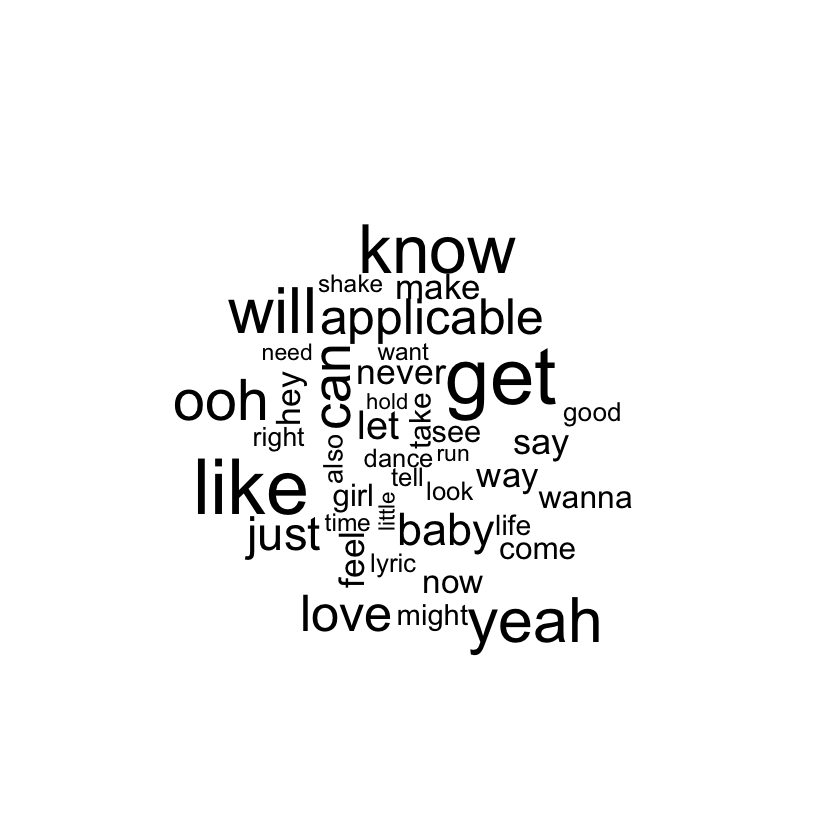

In [72]:
wordcloud(grouped_data$happy$lemmatized_lyrics[1:100], max.words = 40)

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


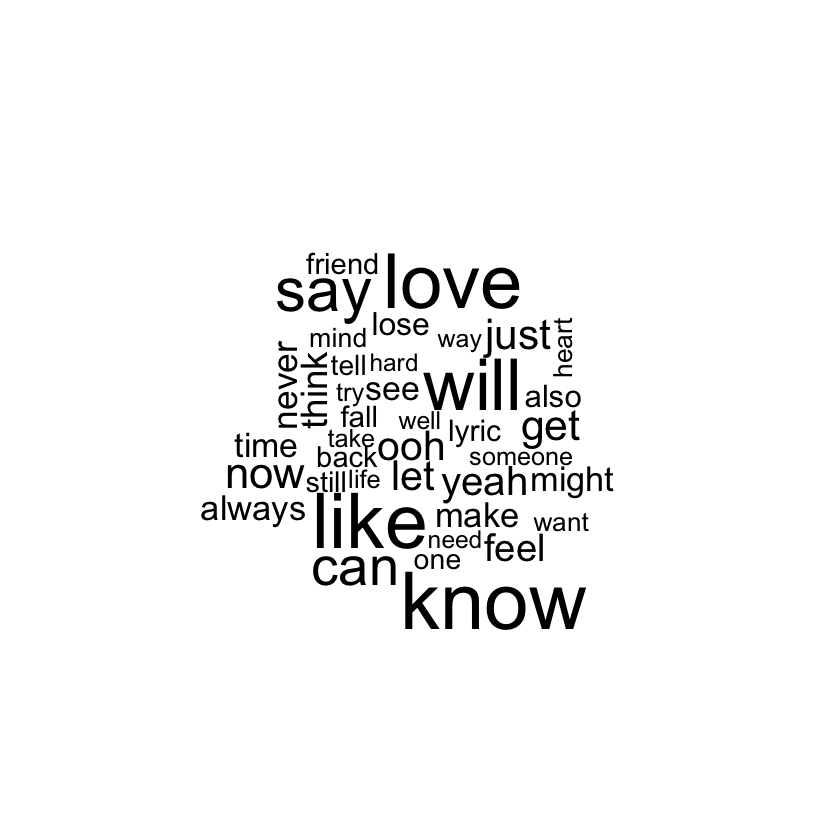

In [73]:
wordcloud(grouped_data$sad$lemmatized_lyrics[1:100], max.words = 40)

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


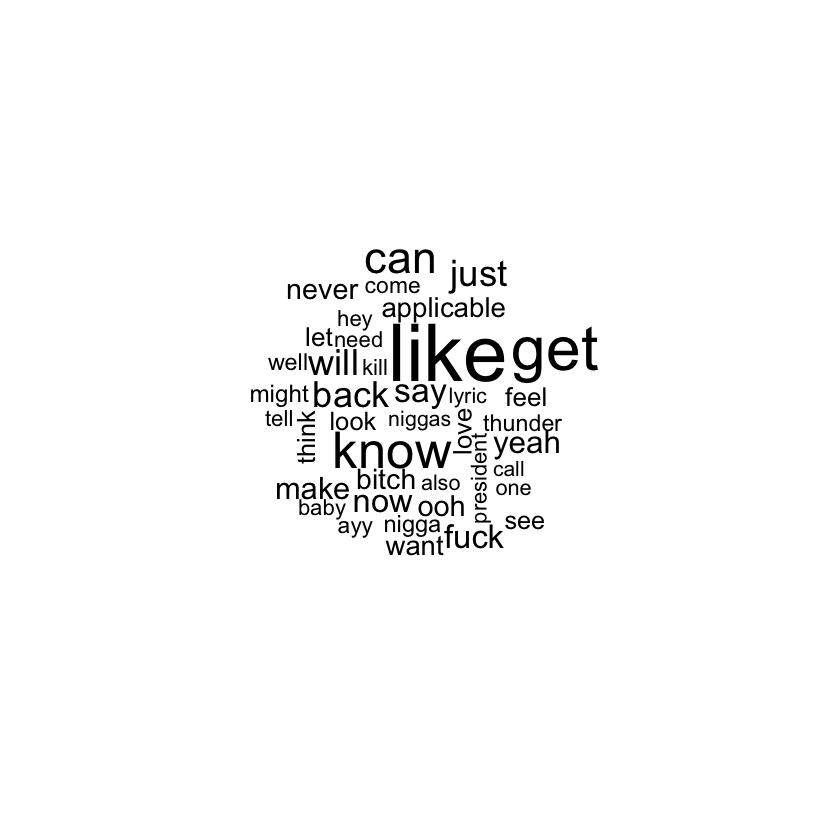

In [74]:
wordcloud(grouped_data$angry$lemmatized_lyrics[1:100], max.words = 40)

In [75]:
help(DocumentTermMatrix)

In [76]:
help(naive_bayes)

In [77]:
help

function (topic, package = NULL, lib.loc = NULL, verbose = getOption("verbose"), 
    try.all.packages = getOption("help.try.all.packages"), help_type = getOption("help_type")) 
{
    types <- c("text", "html", "pdf")
    help_type <- if (!length(help_type)) 
        "text"
    else match.arg(tolower(help_type), types)
    if (!missing(package)) 
        if (is.name(y <- substitute(package))) 
            package <- as.character(y)
    if (missing(topic)) {
        if (!is.null(package)) {
            if (interactive() && help_type == "html") {
                port <- tools::startDynamicHelp(NA)
                if (port <= 0L) 
                  return(library(help = package, lib.loc = lib.loc, 
                    character.only = TRUE))
                browser <- if (.Platform$GUI == "AQUA") {
                  get("aqua.browser", envir = as.environment("tools:RGUI"))
                }
                else getOption("browser")
                browseURL(paste0("http://127.0.0.1:", port, "/library/", 
                  package, "/html/00Index.html"), browser)
                return(invisible())
            }
            else return(library(help = package, lib.loc = lib.loc, 
                character.only = TRUE))
        }
        if (!is.null(lib.loc)) 
            return(library(lib.loc = lib.loc))
        topic <- "help"
        package <- "utils"
        lib.loc <- .Library
    }
    ischar <- tryCatch(is.character(topic) && length(topic) == 
        1L, error = function(e) FALSE)
    if (!ischar) {
        reserved <- c("TRUE", "FALSE", "NULL", "Inf", "NaN", 
            "NA", "NA_integer_", "NA_real_", "NA_complex_", "NA_character_")
        stopic <- deparse1(substitute(topic))
        if (!is.name(substitute(topic)) && !stopic %in% reserved) 
            stop("'topic' should be a name, length-one character vector or reserved word")
        topic <- stopic
    }
    paths <- index.search(topic, find.package(if (is.null(package)) 
        loadedNamespaces()
    else package, lib.loc, verbose = verbose))
    try.all.packages <- !length(paths) && is.logical(try.all.packages) && 
        !is.na(try.all.packages) && try.all.packages && is.null(package) && 
        is.null(lib.loc)
    if (try.all.packages) {
        for (lib in .libPaths()) {
            packages <- .packages(TRUE, lib)
            packages <- packages[is.na(match(packages, .packages()))]
            paths <- c(paths, index.search(topic, file.path(lib, 
                packages)))
        }
        paths <- paths[nzchar(paths)]
    }
    structure(unique(paths), call = match.call(), topic = topic, 
        tried_all_packages = try.all.packages, type = help_type, 
        class = "help_files_with_topic")
}
<bytecode: 0x7fbceea2bff0>
<environment: namespace:utils>